In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# Load the data from the uploaded Excel file
excel_file_path = 'Indonesia.xlsx'
try:
    df = pd.read_excel(excel_file_path)
    # Display the first few rows of the dataframe
    display = df.head()
except Exception as e:
    display = str(e)

display


,Agency,Rating,Outlook,Date
0,Fitch,BBB,Stable,2023-09-01
1,Fitch,BBB,Stable,2022-06-01
2,Moody's,Baa2,Stable,2022-02-01
3,Fitch,BBB,Stable,2021-11-01
4,Fitch,BBB,Stable,2021-03-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Agency   126 non-null    object        
 1   Rating   126 non-null    object        
 2   Outlook  126 non-null    object        
 3   Date     126 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 4.1+ KB


In [4]:
df.describe()

,Date
count,126
mean,2011-08-30 18:28:34.285714176
min,1992-07-01 00:00:00
25%,2005-01-08 18:00:00
50%,2013-05-31 12:00:00
75%,2019-05-01 00:00:00
max,2023-09-01 00:00:00


In [5]:
# Convert 'Date' to year-month format
df['YearMonth'] = df['Date'].dt.to_period('M')

In [6]:
# Calculate value counts for each column in the dataframe
agency_counts = df['Agency'].value_counts()
rating_counts = df['Rating'].value_counts()
outlook_counts = df['Outlook'].value_counts()
month_counts = df['YearMonth'].value_counts()

agency_counts, rating_counts, outlook_counts, month_counts


(Agency
 Fitch                53
 Standard & Poor's    42
 Moody's              31
 Name: count, dtype: int64,
 Rating
 BBB-    26
 BBB     24
 Baa2    16
 B-       8
 B+       8
 CCC+     7
 BB+      6
 BB-      5
 B        4
 BB       3
 Ba2      3
 B1       3
 B2       3
 Baa3     3
 NR       3
 Ba3      2
 Ba1      1
 CCC      1
 Name: count, dtype: int64,
 Outlook
 Stable            77
 Positive          22
 Negative           8
 Under Review       6
 Developing         5
 Negative watch     5
 NR                 3
 Name: count, dtype: int64,
 YearMonth
 2020-01    8
 2019-01    4
 2019-05    4
 2006-02    3
 1998-01    3
           ..
 2014-01    1
 2014-07    1
 2014-08    1
 2014-09    1
 1992-07    1
 Freq: M, Name: count, Length: 96, dtype: int64)

/var/folders/c9/r0x018d10sgb2j79vcspqf8h0000gn/T/ipykernel_72529/1508564473.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Agency', palette=palette_agency)


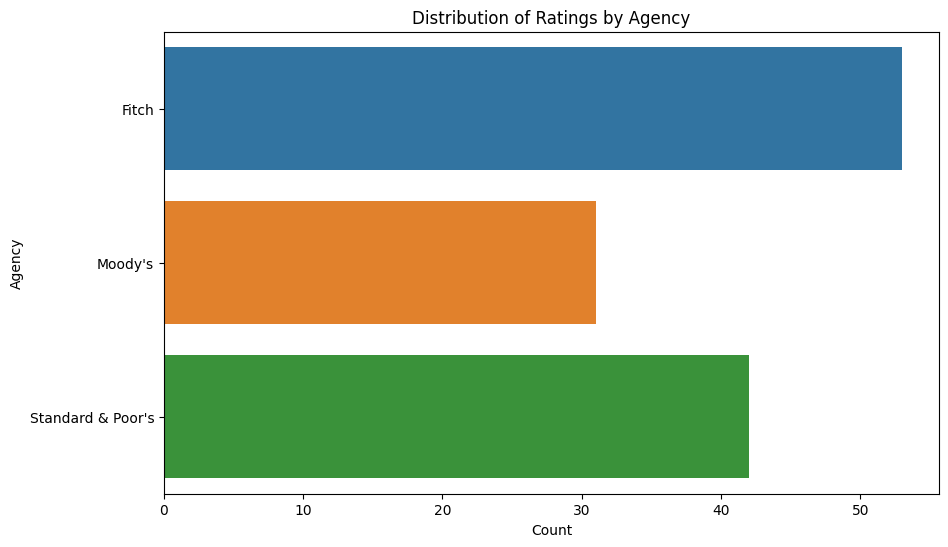

In [7]:
# Re-define the color palette for the Agency plot
palette_agency = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Plot for Agency without legend
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Agency', palette=palette_agency)
plt.title('Distribution of Ratings by Agency')
plt.xlabel('Count')
plt.ylabel('Agency')
plt.show()


/var/folders/c9/r0x018d10sgb2j79vcspqf8h0000gn/T/ipykernel_72529/2088010325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Rating', palette=palette_rating, order=df['Rating'].value_counts().index)


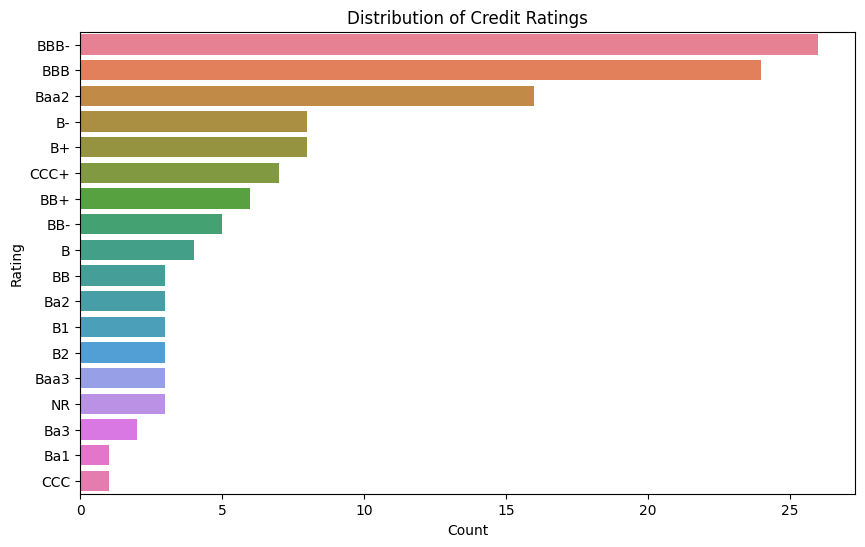

In [8]:
# Re-define the color palette for the Rating plot
palette_rating = sns.color_palette("husl", len(df['Rating'].value_counts()))

# Plot for Rating without legend
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Rating', palette=palette_rating, order=df['Rating'].value_counts().index)
plt.title('Distribution of Credit Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


/var/folders/c9/r0x018d10sgb2j79vcspqf8h0000gn/T/ipykernel_72529/2919679090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Outlook', palette=palette_outlook, order=df['Outlook'].value_counts().index)


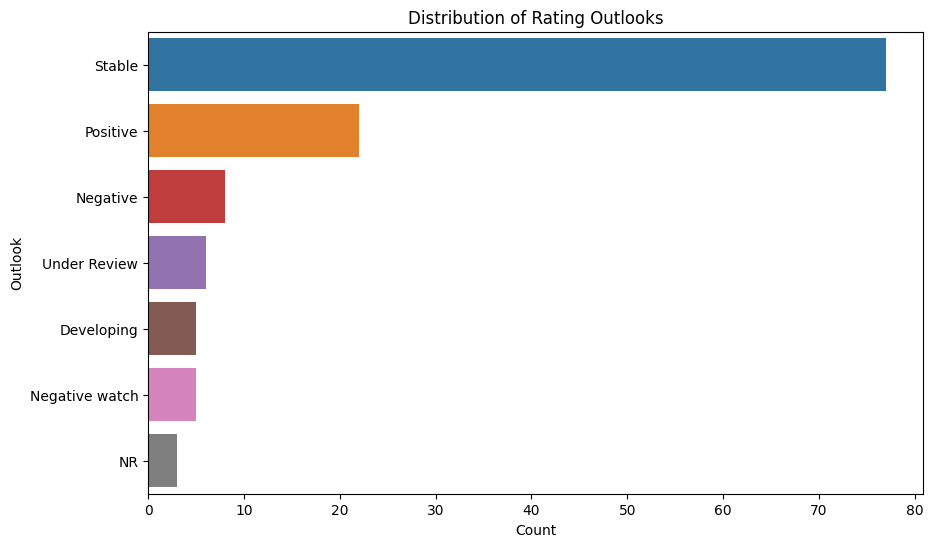

In [9]:
# Re-define the color palette for the Outlook plot
palette_outlook = ["#1f77b4", "#ff7f0e", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

# Plot for Outlook without legend
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Outlook', palette=palette_outlook, order=df['Outlook'].value_counts().index)
plt.title('Distribution of Rating Outlooks')
plt.xlabel('Count')
plt.ylabel('Outlook')
plt.show()


/var/folders/c9/r0x018d10sgb2j79vcspqf8h0000gn/T/ipykernel_72529/4248861812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='YearMonth', palette=palette_year)


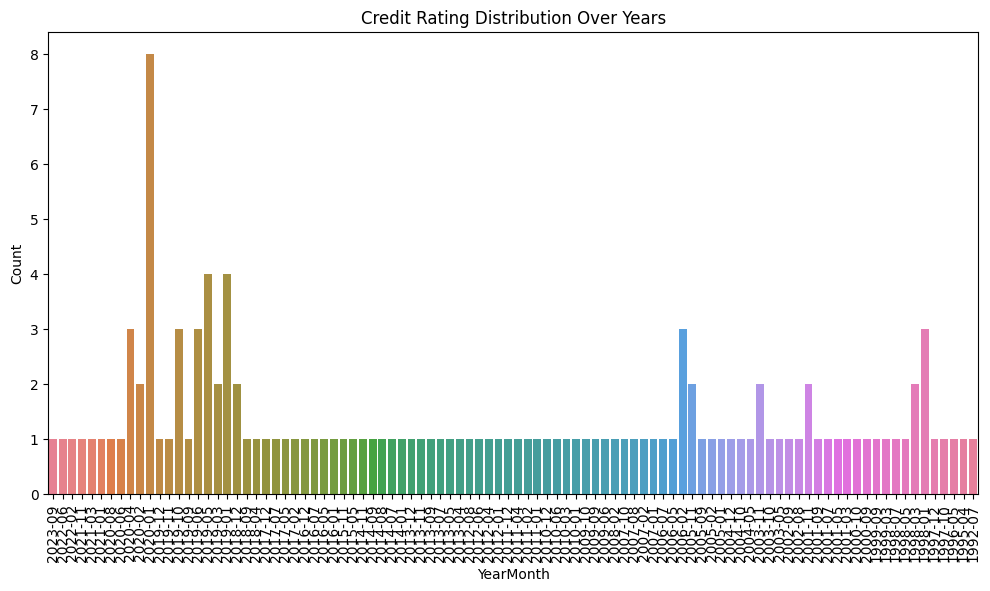

In [10]:
# The color palette for the Date plot will be based on the number of years
palette_year = sns.color_palette("husl", len(df['YearMonth'].unique()))

# Plot for Date (Time Series) with specific color palette
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='YearMonth', palette=palette_year)
plt.title('Credit Rating Distribution Over Years')
plt.xlabel('YearMonth')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

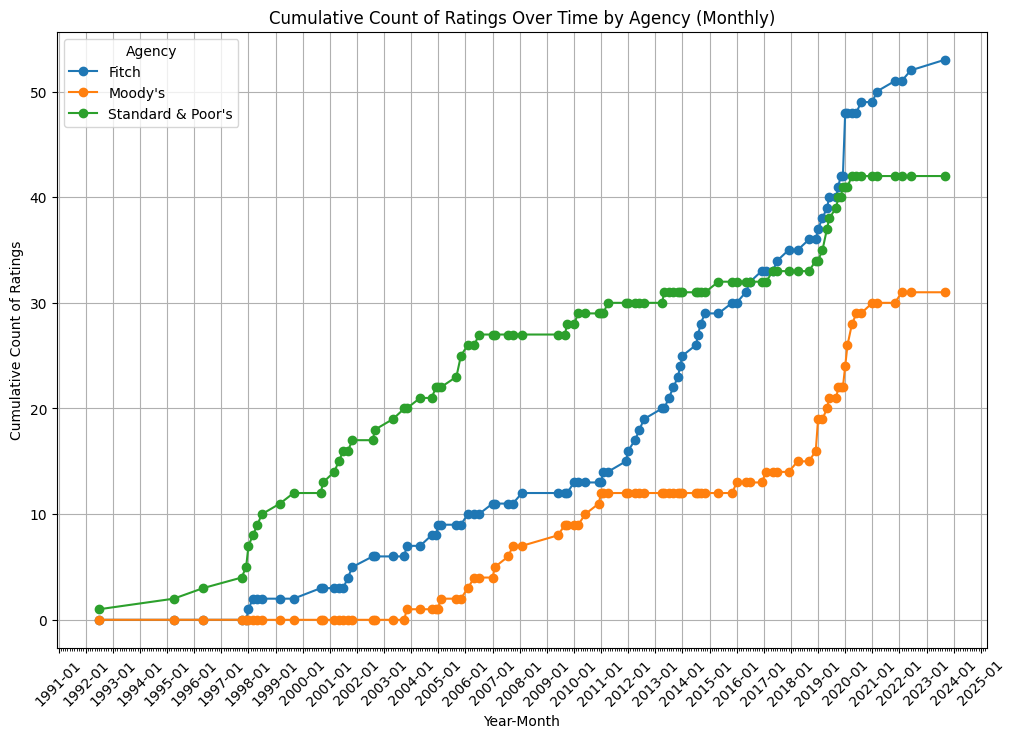

In [11]:
# Group by 'YearMonth' and 'Agency', then count the number of ratings per agency in each year-month
time_series_monthly_data = df.groupby(['YearMonth', 'Agency']).size().unstack().fillna(0).cumsum()

# Plot
plt.figure(figsize=(12, 8))
for agency in time_series_monthly_data.columns:
    plt.plot(time_series_monthly_data.index.to_timestamp(), time_series_monthly_data[agency], label=agency, marker='o')

# Formatting the plot
plt.title('Cumulative Count of Ratings Over Time by Agency (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Count of Ratings')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.legend(title='Agency')
plt.grid(True)
plt.show()


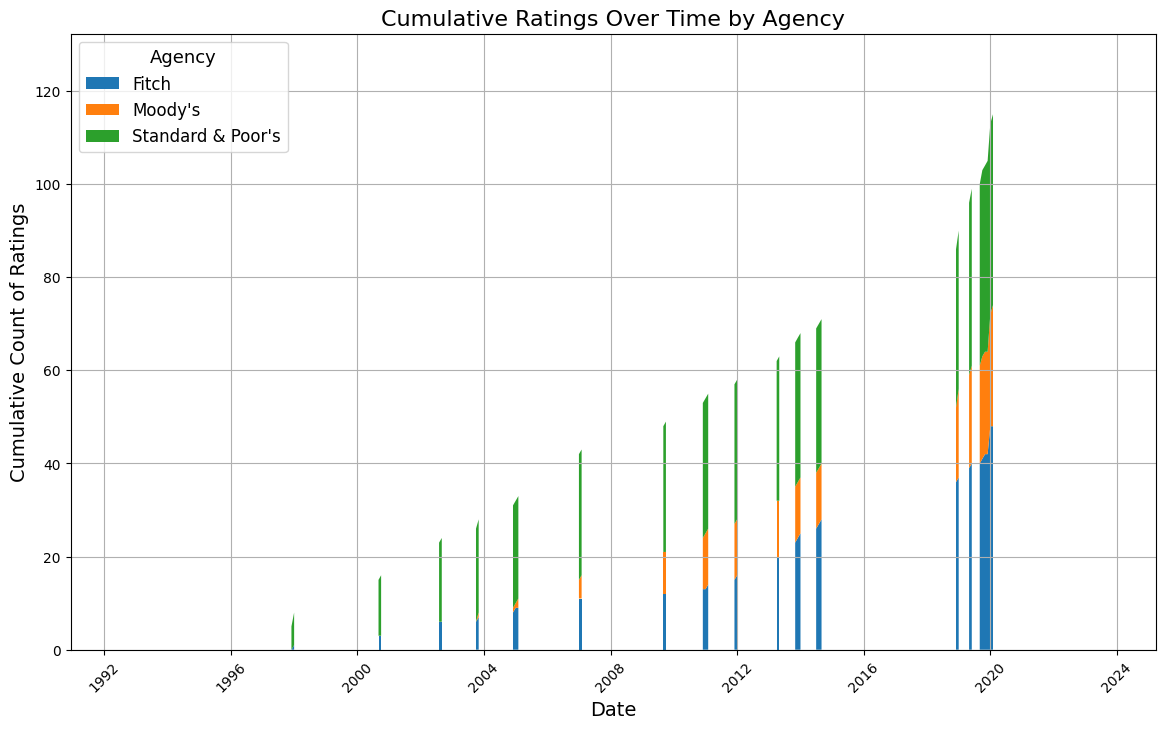

In [12]:


# Preparing data for the time series line plot again
ts_data = df.groupby(['YearMonth', 'Agency']).size().unstack().fillna(0).resample('M').sum()


# Preparing data for the stacked area plot
stacked_data = ts_data.cumsum()

# Stacked Area Plot for each agency
plt.figure(figsize=(14, 8))
plt.stackplot(stacked_data.index.to_timestamp(), stacked_data.T, labels=stacked_data.columns)
plt.title('Cumulative Ratings Over Time by Agency', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Count of Ratings', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Agency', loc='upper left', title_fontsize='13', fontsize='12')
plt.grid(True)

# Show plot
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

# Creating a custom mapping for the ratings based on the provided order
custom_rating_order = {
    'NR': 0,   # No rating
    'CCC': 1, 'CCC+': 2,
    'B-': 3, 'B': 4, 'B+': 5,
    'B1': 6, 'B2': 7,  # Moody's rating equivalent to S&P's 'B'
    'BB-': 8, 'BB': 9, 'BB+': 10,
    'Ba1': 11, 'Ba2': 12, 'Ba3': 13,  # Moody's rating equivalent to S&P's 'BB'
    'BBB-': 14, 'BBB': 15,
    'Baa2': 16, 'Baa3': 17  # Moody's rating equivalent to S&P's 'BBB'
}

# Apply the custom rating order to the dataframe
df['RatingCustomEncoded'] = df['Rating'].map(custom_rating_order)


In [14]:
# Creating a custom mapping for the outlooks based on the provided order
custom_outlook_order = {
    'NR': 0,              # No rating
    'Stable': 1,          # Stable
    'Positive': 2,        # Positive
    'Negative': 3,        # Negative
    'Under Review': 4,    # Under Review
    'Developing': 5,      # Developing
    'Negative watch': 6   # Negative watch
}

# Apply the custom outlook order to the dataframe
df['OutlookCustomEncoded'] = df['Outlook'].map(custom_outlook_order)

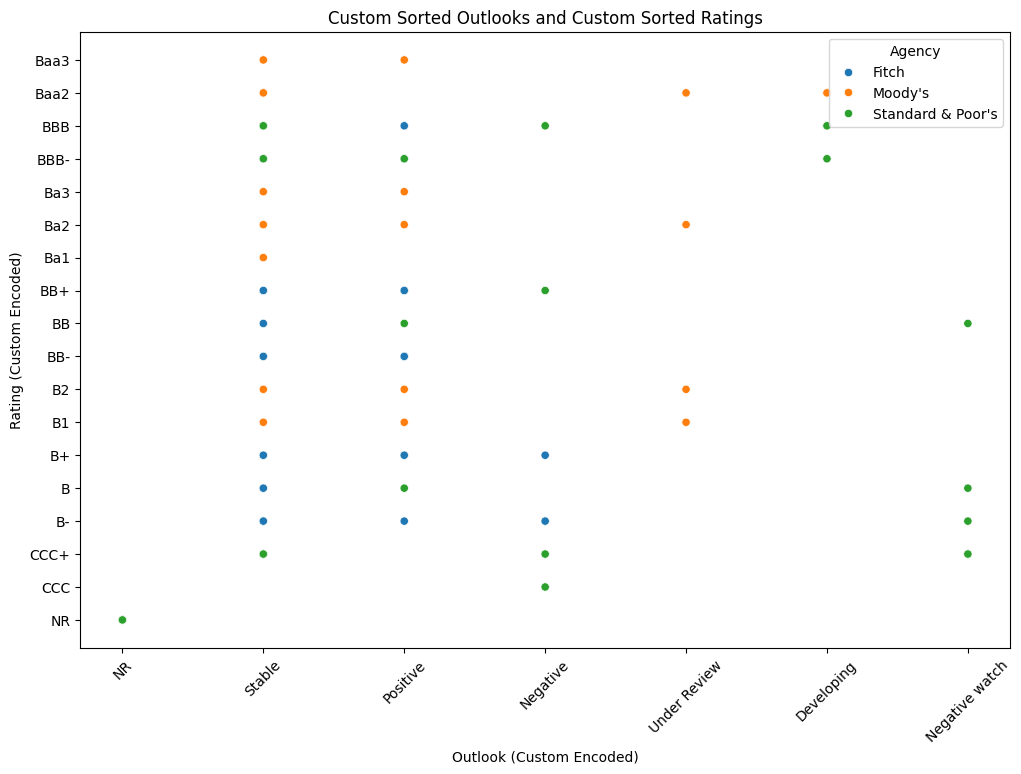

In [15]:
# Creating a scatter plot with the custom sorted outlook encoding
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='OutlookCustomEncoded', y='RatingCustomEncoded', hue='Agency', palette=palette_agency)
plt.title('Custom Sorted Outlooks and Custom Sorted Ratings')
plt.xlabel('Outlook (Custom Encoded)')
plt.ylabel('Rating (Custom Encoded)')

# Displaying the sorted mappings for reference
plt.xticks(list(custom_outlook_order.values()), list(custom_outlook_order.keys()), rotation=45)
plt.yticks(list(custom_rating_order.values()), list(custom_rating_order.keys()))

plt.show()

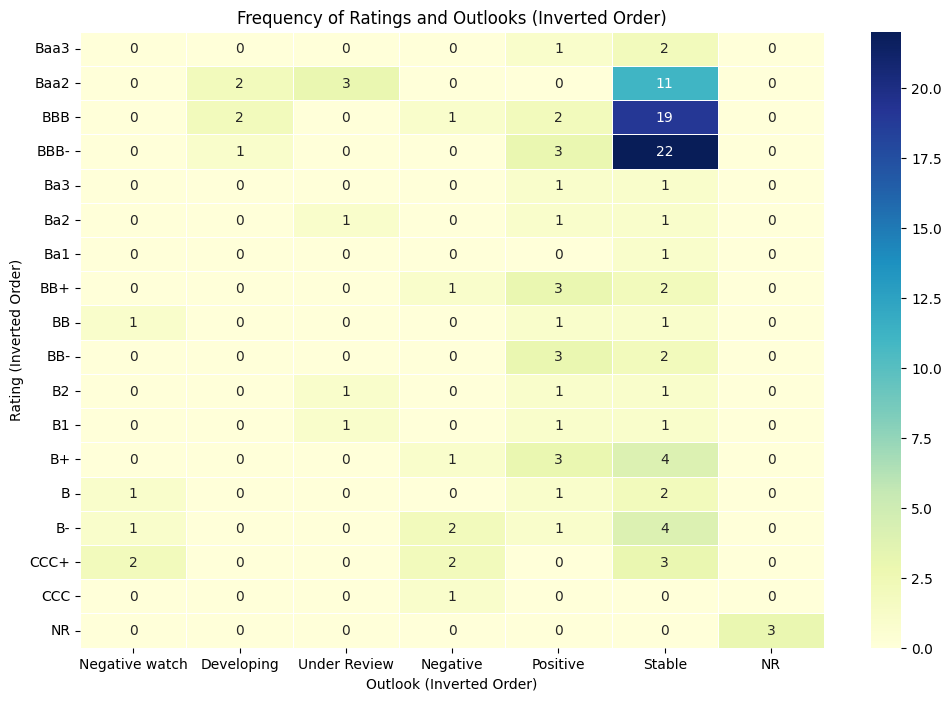

In [16]:


# Assuming 'df' is your DataFrame and it has columns 'Rating', 'Outlook', and 'YearMonth'
# Group by 'Rating' and 'Outlook' and count the occurrences
heatmap_data = df.groupby(['Rating', 'Outlook']).size().unstack(fill_value=0)

# Apply the custom orders to 'Rating' and 'Outlook'
# Ensure you have defined 'custom_rating_order' and 'custom_outlook_order' as before
heatmap_data = heatmap_data.reindex(index=custom_rating_order.keys(), columns=custom_outlook_order.keys())

# Invert the order of the heatmap data for both rows and columns
inverted_heatmap_data = heatmap_data.iloc[::-1, ::-1]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(inverted_heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d")
plt.title('Frequency of Ratings and Outlooks (Inverted Order)')
plt.xlabel('Outlook (Inverted Order)')
plt.ylabel('Rating (Inverted Order)')
plt.show()


In [17]:
# Grouping data by Rating and Outlook, then counting the occurrences
heatmap_data_rating_outlook = df.groupby(['Rating', 'Outlook']).size().unstack(fill_value=0)

# Applying the custom order to Rating and Outlook
heatmap_data_rating_outlook = heatmap_data_rating_outlook.reindex(custom_rating_order.keys())
heatmap_data_rating_outlook = heatmap_data_rating_outlook[custom_outlook_order.keys()]


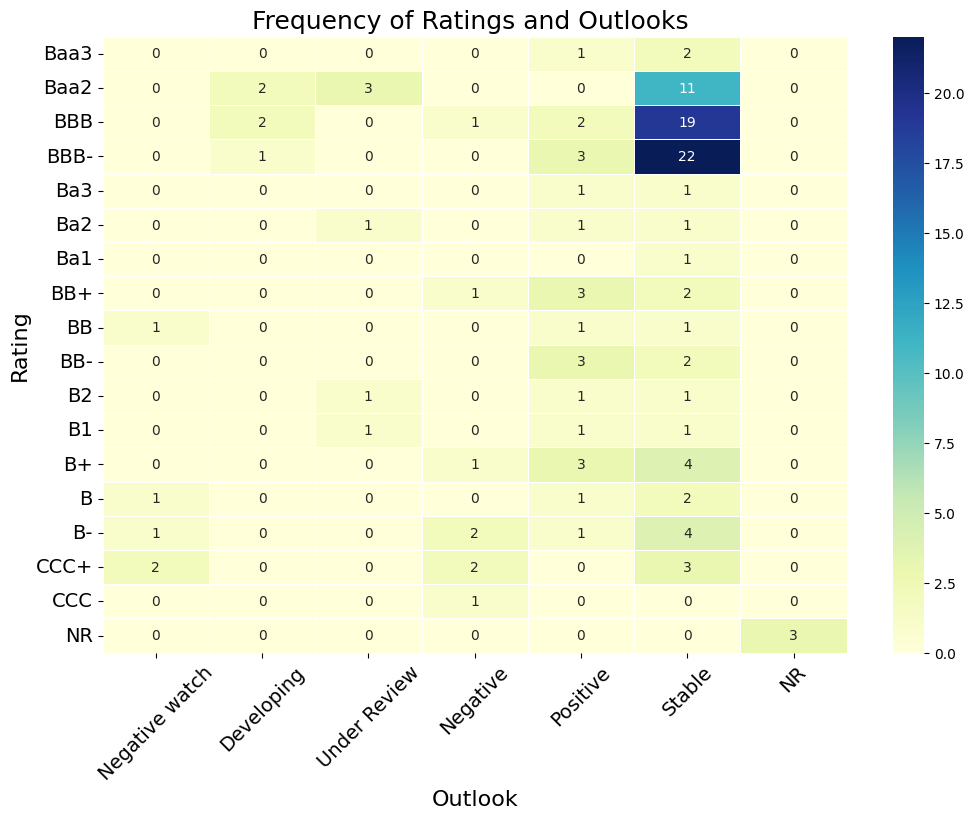

In [18]:
# Adjusting the heatmap to display better ratings and outlooks on the top and right, and worse on the bottom and left
# Inverting the order of rows and columns for the heatmap data
inverted_heatmap_data = heatmap_data_rating_outlook.iloc[::-1, ::-1]

# Creating the heatmap with adjusted order
plt.figure(figsize=(12, 8))
sns.heatmap(inverted_heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d")

# Enhancing title and labels
plt.title('Frequency of Ratings and Outlooks ', fontsize=18)
plt.xlabel('Outlook', fontsize=16)
plt.ylabel('Rating', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

# Show plot with enhanced aesthetics
plt.show()
